In [131]:
import dxfgrabber  #after doing "pip install dxfgrabber" from a terminal window
#CKH the plan is to create 2D cad files then move them out as dxf, spit out a csv file of xy points along paths it finds
#Another program reads the xy points to create an embroidery pattern

In [132]:
dxf=dxfgrabber.readfile("FiberLoop.dxf") #see https://pythonhosted.org/dxfgrabber/   

In [133]:
print("DXF version: {}".format(dxf.dxfversion))
header_var_count = len(dxf.header) # dict of dxf header vars
#what else is here? see this http://stackoverflow.com/questions/16634209/python-how-to-use-a-third-party-library

DXF version: AC1018


In [134]:
for layer in dxf.layers:  #peeking at what is here
    print layer.name
    print layer.color

0
7
Layer 1
7


In [135]:
#get all entities on layer x --this does nothing but it is an example of what's available
all_layer_0_entities = [entity for entity in dxf.entities if entity.layer == '0']
all_layer_1_entities = [entity for entity in dxf.entities if entity.layer == '1']
all_entities = [entity for entity in dxf.entities]


In [136]:
all_entities

In [137]:
dxf.entities.__len__()

1

In [138]:
for block in dxf.blocks:
    print len(block)
    print block.name  #These names and layers change from file to file, I am just peeking

0
*Paper_Space0
0
*Model_Space
0
*Paper_Space


In [139]:
stitchxdata=[]
stitchydata=[]
for entity in all_entities:
    #print dir(entity)  #How I found out about the dxftype attribute. Splines are found in illustrator dxf file.
    #print entity.dxftype
    if entity.dxftype == 'POLYLINE':  #did not find polylines in illustrator dxf file I made, but they were in Huichan's dxf
        #print dir(entity)
        for vertex in entity.vertices:
             #print vertex.location
             stitchxdata.append(vertex.location[0])
             stitchydata.append(vertex.location[1])
    if entity.dxftype == 'SPLINE':  #the splines ctrl points are chunky so in Illustrator i did "add anchor points" and hand edited
        for point in entity.controlpoints: #Does chunky matter? Will the fiber just flow around the corners bc it is sorta rigid?
            stitchxdata.append(point[0]*25.4)#my illustrator file was in inches
            stitchydata.append(point[1]*25.4) # I would like to skip the hand-editing and interpolate this spline with evenly spaced points
  
        


In [140]:
stitchxdata #just peeking

[14.69523674147348,
 13.8212154402786,
 12.43818094534488,
 10.60659472232455,
 8.386573727094037,
 5.838579425305571,
 3.022901027723484,
 0.0,
 -3.022901027723484,
 -5.838579425305571,
 -8.386573727094037,
 -10.60659472232455,
 -12.43818094534488,
 -13.8212154402786,
 -14.69523674147348,
 -14.99995563816519,
 -14.73382183636265,
 -13.93490366629134,
 -13.33511214663021,
 -11.7346919831691,
 -10.03195241629654,
 -8.027594540714428,
 -6.494698293309376,
 -5.286502509592211,
 -5.000042631017696,
 -5.000042631017696,
 -5.000042631017696,
 -5.000042631017696,
 -5.000042631017696,
 -5.000042631017696,
 -5.000042631017696,
 -2.646007333002475,
 0.0,
 2.528357244568083,
 5.000042631017696,
 5.000042631017696,
 5.000042631017696,
 5.000042631017696,
 5.000042631017696,
 5.000042631017696,
 5.000042631017696,
 5.000042631017696,
 4.999870376129799,
 4.898239992269929,
 4.145830641931096,
 2.795524575698012,
 1.007691094203794,
 -0.5112525072815146,
 -2.383146374069998,
 -3.858164979141295,
 -4

(-15.0, 15.0, -40.0, 20.0)

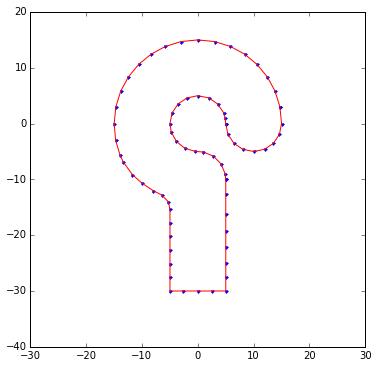

In [141]:
%matplotlib inline
import matplotlib.pyplot as plt
#getting this from here http://nbviewer.ipython.org/github/ipython/ipython/blob/1.x/examples/notebooks/Part%203%20-%20Plotting%20with%20Matplotlib.ipynb
plt.figure(1,figsize=(6,6))
plt.plot(stitchxdata,stitchydata,'b.')
plt.hold(True)
plt.plot(stitchxdata,stitchydata,'r-')
plt.axis('equal')



In [142]:
f=open('HuichanRemodel.csv','w')
for i in range(0,len(stitchxdata)):
    f.write("%.3f,%.3f\r\n"%(stitchxdata[i],stitchydata[i]))
